In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## things to consider:
- cross validation
- scaling, normalizing
- validation data set
- confidence intervals
- resampling
- compute ttests
- find best predictors

In [121]:
df = pd.read_csv("all_data.csv").drop(columns=['Unnamed: 0'])

In [122]:
light_status = []
for i in range(df.shape[0]):
    if df.loc[i,'avg_hrly_light'] == 4095.:
        light_status.append(0)
    else:
        light_status.append(1)


In [123]:
df['light_status'] = light_status

In [124]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [133]:
train_data.columns

Index(['day', 'hour', 'month', 'weekday', 'avg_hrly_hum', 'avg_hrly_temp',
       'avg_hrly_press', 'tot_motion_count', 'avg_hrly_light', 'num_psets_due',
       'light_status'],
      dtype='object')

In [134]:
X_train = train_data.drop(columns=['light_status','avg_hrly_light'])
y_train = train_data['light_status']
X_test = test_data.drop(columns=['light_status', 'avg_hrly_light'])
y_test = test_data['light_status']

In [135]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def standardize(train_df, val_df):
    # builtin standardscaler
    
    # fit on train df
    scaler = StandardScaler(with_mean=True) # with mean=True also centers before scaling
    scaler.fit(train_df)
    
    # transform train
    train_scaled = scaler.transform(train_df)
    scaled_train_df = pd.DataFrame(train_scaled, index=train_df.index, columns=train_df.columns)
    
    # transform val
    val_scaled = scaler.transform(val_df)
    scaled_val_df = pd.DataFrame(val_scaled, index=val_df.index, columns=val_df.columns)
    
    return scaled_train_df, scaled_val_df #, scaled_test_df

In [136]:
X_train_scaled, X_test_scaled = standardize(X_train, X_test)

In [137]:
X_train_scaled

,day,hour,month,weekday,avg_hrly_hum,avg_hrly_temp,avg_hrly_press,tot_motion_count,num_psets_due
222,-0.886584,-0.080360,0.265372,0.494849,0.433721,0.153051,0.900020,-0.461929,1.086579
185,-1.102844,1.519188,0.265372,-0.581878,0.844598,0.261039,-0.178907,1.077288,2.710342
345,-0.237805,0.792121,0.265372,-0.043514,-0.569683,-1.034819,0.919853,-0.461929,-0.537185
432,0.302845,-1.534495,0.265372,-1.120242,-0.967584,-1.315589,0.707568,-0.461929,-0.537185
533,0.843495,-1.389081,0.265372,1.571577,-0.586983,0.520211,-1.072422,-0.461929,-0.537185
...,...,...,...,...,...,...,...,...,...
271,-0.562194,0.501294,0.265372,-1.658605,-0.202056,1.124945,-0.067546,-0.461929,-0.537185
556,0.951625,-1.534495,0.265372,-1.658605,-0.362082,0.433820,-2.222948,-0.461929,-0.537185
393,0.086585,-0.225774,0.265372,1.571577,-1.140585,-1.056417,1.576219,0.755660,-0.537185
256,-0.778454,1.373774,0.265372,1.033213,0.472646,0.822578,0.831995,-0.461929,-0.537185


Linear Regression

In [145]:
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
lin_pred_train = model.predict(X_train)
lin_pred_test = model.predict(X_test)

0.47867799607010164
0.49427463621652873


Ridge Regression

In [139]:
clf = Ridge(alpha=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.478677981118219
0.49425709514833577


Lasso Regression

In [140]:
# lambdas = [0.01, 0.05, 0.1, 5, 10, 50, 100]
# , alphas=lam, max_iter=100000
# for lam in lambdas:
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.4150209063090498
0.4046438145653236


Can try other models for classifying later ... if want to look at a different problem

Logistic Regression

- could look at misclassification rate for logistic vs linear

In [147]:
logreg = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))
log_pred_train = logreg.predict(X_train)
log_pred_test = logreg.predict(X_test)

0.9172932330827067
0.9552238805970149


In [149]:
log_pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0])

In [151]:
X_train.shape, y_train.shape

((532, 9), (532,))

AttributeError: 'Series' object has no attribute 'reshape'

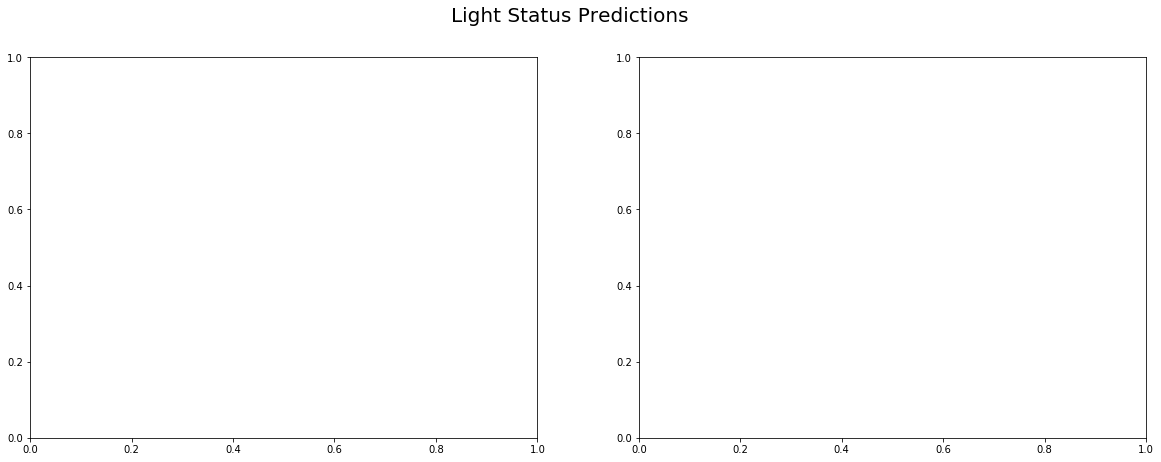

In [152]:
# lin_train_pred = pd.DataFrame({"X": best_predictor_train, "Pred": y_train_pred}).sort_values("Pred")
# lin_test_pred = pd.DataFrame({"X": best_predictor_test, "Pred": y_test_pred}).sort_values("Pred")

fig, axes = plt.subplots(1,2,figsize=(20,7))
fig.suptitle("Light Status Predictions", fontsize=20)
axes.ravel()

# train 
axes[0].scatter(X_train,y_train, label="True Light Status", alpha=0.5)
axes[0].plot(X_train, lin_train_pred, label="linear regression", c="g")
# axes[0].scatter(best_predictor_train, y_train_pred2[:,0], label="logistic regression, class 0", alpha=0.7, c="red")
axes[0].scatter(X_train, log_pred_train, label="logistic regression", alpha=0.7, c="m")
axes[0].plot(best_predictor_train, [0.5]*best_predictor_train.shape[0], label="y=0.5", c="black")
axes[0].legend()
axes[0].set_title("Train Data")
axes[0].set_xlabel("Best Gene Predictor")
axes[0].set_ylabel("Predicted Values")
axes[0].grid(False)

# test
# axes[1].scatter(best_predictor_test,y_test, label="True binary Response", alpha=0.5)
# axes[1].plot(lin_test_pred.X, lin_test_pred.Pred, label="linear regression", c="g")
# # axes[1].scatter(best_predictor_test, y_test_pred2[:,0], label="logistic regression, class 0", alpha=0.7, c="red")
# axes[1].scatter(best_predictor_test, y_test_pred2[:,1], label="logistic regression, class 1", alpha=0.7, c="m")
# axes[1].plot(best_predictor_test, [0.5]*best_predictor_test.shape[0], label="y=0.5", c="black")
# axes[1].legend()
# axes[1].set_title("Test Data")
# axes[1].set_xlabel("Best Gene Predictor")
# axes[1].set_ylabel("Predicted Values")
# axes[1].grid(False)
# plt.show()
# plot predict prob a